In [2]:
import numpy as np
import matplotlib.pyplot as plt

Exercise 1


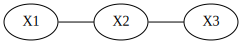

In [3]:
from graphviz import Graph

g = Graph()
g.attr(rankdir='LR')
g.edge('X1', 'X2')
g.edge('X2', 'X3')
g

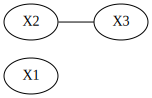

In [4]:
g = Graph()
g.attr(rankdir='LR')
g.node('X1')
g.edge('X2', 'X3')

g

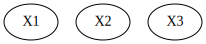

In [5]:
g = Graph()

g.node('X1')
g.node('X2')
g.node('X3')

g

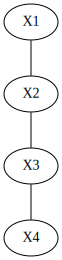

In [6]:
g = Graph()

g.edge('X2', 'X3')
g.edge('X1', 'X2')
g.edge('X3', 'X4')

g


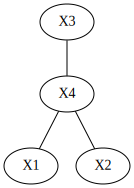

In [7]:
g = Graph()
g.edge('X3', 'X4')
g.edge('X4', 'X1')
g.edge('X4', 'X2')

g

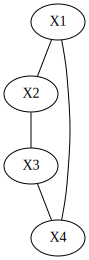

In [8]:
g = Graph()
g.edge('X1', 'X2')
g.edge('X2', 'X3')
g.edge('X3', 'X4')
g.edge('X1', 'X4')
g

Exercise 4

To construct the likelihood ratio test for the hypothesis

$ H_0: X_1 \perp X_2 \mid X_3 $

versus

$ H_1: X_1 \not\perp X_2 \mid X_3, $

we need to define the likelihood ratio test statistic and decide on a critical region based on this statistic.

### Definitions and Notations

- Let $ X_1, X_2, X_3 $ be binary random variables, taking values in $ \{0, 1\} $.
- $ P_{ijk} = P(X_1 = i, X_2 = j, X_3 = k) $ for $ i, j, k \in \{0, 1\} $.
- $ P_{i \cdot k} = P(X_1 = i, X_3 = k) $, $ P_{\cdot j k} = P(X_2 = j, X_3 = k) $, and $ P_{\cdot \cdot k} = P(X_3 = k) $.

### Likelihoods under $ H_0 $ and $ H_1 $

Under $ H_0 $, $ X_1 $ and $ X_2 $ are conditionally independent given $ X_3 $. Therefore, the joint probability can be factorized as:

$ P_{ijk}^{H_0} = P(X_1 = i \mid X_3 = k) P(X_2 = j \mid X_3 = k) P(X_3 = k). $

These can be written as:

$ P(X_1 = i \mid X_3 = k) = \frac{P_{i \cdot k}}{P_{\cdot \cdot k}}, $
$ P(X_2 = j \mid X_3 = k) = \frac{P_{\cdot j k}}{P_{\cdot \cdot k}}, $
$ P_{ijk}^{H_0} = \frac{P_{i \cdot k} P_{\cdot j k}}{P_{\cdot \cdot k}^2}. $

Under $ H_1 $, the joint distribution is:

$ P_{ijk}^{H_1} = P(X_1 = i, X_2 = j, X_3 = k). $

### Likelihood Ratio

The likelihood ratio $ \Lambda $ is given by:

$ \Lambda = \frac{L(H_0)}{L(H_1)} = \prod_{i,j,k} \left( \frac{P_{ijk}^{H_0}}{P_{ijk}^{H_1}} \right)^{n_{ijk}}, $

where $ n_{ijk} $ is the number of observations of $ (X_1, X_2, X_3) = (i, j, k) $ in the sample.

Plugging in the probabilities under each hypothesis:

$ \Lambda = \prod_{i,j,k} \left( \frac{\frac{P_{i \cdot k} P_{\cdot j k}}{P_{\cdot \cdot k}^2}}{P_{ijk}} \right)^{n_{ijk}}. $

### Test Statistic

Typically, we use $ -2 \log \Lambda $ as the test statistic:

$ -2 \log \Lambda = -2 \sum_{i,j,k} n_{ijk} \log \left( \frac{\frac{P_{i \cdot k} P_{\cdot j k}}{P_{\cdot \cdot k}^2}}{P_{ijk}} \right). $

This simplifies to:

$ -2 \log \Lambda = 2 \sum_{i,j,k} n_{ijk} \log \left( \frac{P_{ijk}}{\frac{P_{i \cdot k} P_{\cdot j k}}{P_{\cdot \cdot k}^2}} \right). $

### Deciding the Critical Region

The critical region for the likelihood ratio test is determined by:

$ -2 \log \Lambda > \chi^2_{\alpha, \text{df}}, $

where $ \chi^2_{\alpha, \text{df}} $ is the chi-squared critical value at significance level $ \alpha $ and degrees of freedom $ \text{df} $.




Exercise 5

In [9]:
X = np.array([[[35, 59], [47, 112]], [[42, 77], [26, 76]]])
X

array([[[ 35,  59],
        [ 47, 112]],

       [[ 42,  77],
        [ 26,  76]]])

In [10]:
from scipy.stats import chi2

X = np.array([[[35, 59],
               [42, 77]],
              [[47, 112],
               [26, 76]]])

#marginal counts
x3_0 = np.sum(X[:, :, 0])
x3_1 = np.sum(X[:, :, 1])

x1_x3_00 = np.sum(X[:, 0, 0])
x1_x3_01 = np.sum(X[:, 0, 1])
x1_x3_10 = np.sum(X[:, 1, 0])
x1_x3_11 = np.sum(X[:, 1, 1])

x2_x3_00 = np.sum(X[0, :, 0])
x2_x3_01 = np.sum(X[0, :, 1])
x2_x3_10 = np.sum(X[1, :, 0])
x2_x3_11 = np.sum(X[1, :, 1])

#Expected counts under H0
E_000 = x1_x3_00 * x2_x3_00 / x3_0
E_010 = x1_x3_00 * x2_x3_10 / x3_0
E_100 = x1_x3_10 * x2_x3_00 / x3_0
E_110 = x1_x3_10 * x2_x3_10 / x3_0

E_001 = x1_x3_01 * x2_x3_01 / x3_1
E_011 = x1_x3_01 * x2_x3_11 / x3_1
E_101 = x1_x3_11 * x2_x3_01 / x3_1
E_111 = x1_x3_11 * x2_x3_11 / x3_1

X[0,1,1]

77

In [11]:
l_alt = X[0,0,0] * np.log(X[0,0,0]) + X[0,0,1] * np.log(X[0,0,1]) + X[0,1,0] * np.log(X[0,1,0]) + X[0,1,1] * np.log(X[0,1,1]) + \
        X[1,0,0] * np.log(X[1,0,0]) + X[1,0,1] * np.log(X[1,0,1]) + X[1,1,0] * np.log(X[1,1,0]) + X[1,1,1] * np.log(X[1,1,1])

l_null = X[0,0,0] * np.log(E_000) + X[0,0,1] * np.log(E_001) + X[0,1,0] * np.log(E_010) + X[0,1,1] * np.log(E_011) + \
        X[1,0,0] * np.log(E_100) + X[1,0,1] * np.log(E_101) + X[1,1,0] * np.log(E_110) + X[1,1,1] * np.log(E_111)

G_test = 2 * (l_alt - l_null)
G_test

45.57074190563071

In [14]:
#the full model has 7 free parameters while the reduced model has 5 free parameters, so dgf are 7-5=2
from scipy.stats import chi2
p_value = 1 - chi2.cdf(G_test, 2)
print(p_value)
print('null is rejected, there is an association between location and diagnosis given outcome')

1.2718592845573085e-10
null is rejected, there is an association between location and diagnosis given outcome
